## Катание на CartPole

> **Проблема**: Если Питер хочет убежать от волка, ему нужно двигаться быстрее него. Мы посмотрим, как Питер может научиться кататься на коньках, в частности, сохранять равновесие, используя Q-Learning.

Сначала установим gym и импортируем необходимые библиотеки:


In [1]:
#code block 1

## Создайте среду cartpole


In [ ]:
#code block 2

Чтобы увидеть, как работает среда, давайте запустим короткую симуляцию на 100 шагов.


In [ ]:
#code block 3

Во время симуляции нам нужно получать наблюдения, чтобы решить, как действовать. Функция `step` возвращает текущие наблюдения, функцию вознаграждения и флаг `done`, который указывает, имеет ли смысл продолжать симуляцию или нет:


In [ ]:
#code block 4

Мы можем получить минимальное и максимальное значение этих чисел:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Давайте также изучим другой метод дискретизации с использованием бинов:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Давайте теперь запустим короткую симуляцию и понаблюдаем за этими дискретными значениями окружающей среды.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


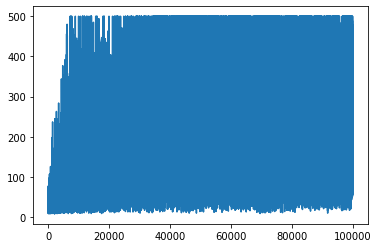

In [20]:
plt.plot(rewards)

Из этого графика невозможно ничего сказать, потому что из-за природы стохастического процесса обучения длина обучающих сессий сильно варьируется. Чтобы придать этому графику больше смысла, мы можем вычислить **скользящее среднее** по серии экспериментов, скажем, 100. Это можно удобно сделать с помощью `np.convolve`:


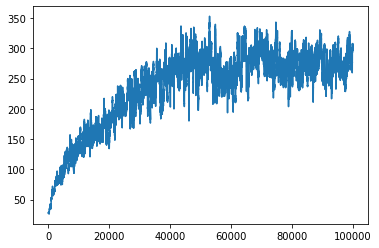

In [22]:
#code block 12

## Изменение гиперпараметров и наблюдение результата в действии

Теперь было бы интересно увидеть, как ведет себя обученная модель. Давайте запустим симуляцию, следуя той же стратегии выбора действий, что и во время обучения: выбор на основе распределения вероятностей в Q-таблице:


In [23]:
# code block 13

## Сохранение результата в анимированный GIF

Если вы хотите впечатлить своих друзей, вы можете отправить им анимированный GIF с изображением балансирующего шеста. Для этого мы можем вызвать `env.render`, чтобы создать кадр изображения, а затем сохранить эти кадры в анимированный GIF с помощью библиотеки PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Отказ от ответственности**:  
Этот документ был переведен с помощью сервиса автоматического перевода [Co-op Translator](https://github.com/Azure/co-op-translator). Несмотря на наши усилия обеспечить точность, автоматические переводы могут содержать ошибки или неточности. Оригинальный документ на его родном языке следует считать авторитетным источником. Для получения критически важной информации рекомендуется профессиональный перевод человеком. Мы не несем ответственности за любые недоразумения или неправильные интерпретации, возникающие в результате использования данного перевода.
